## Notebook Overview

This notebook builds upon the prepared data from the previous notebook (`02_feature_selection_and_preparation.ipynb`) and focuses on **Exploratory Data Analysis (EDA)**. This stage involves gaining a deeper understanding of the data through visualizations, summary statistics, and various analytical techniques. The insights gained from EDA will inform subsequent feature engineering, model selection, and interpretation of results.

### 0.3.1 Objectives

The main objectives of this notebook are:

1. **Understand Data Distributions:** Visualize the distributions of individual features (numerical and categorical) to identify patterns, outliers, and potential data quality issues.
2. **Explore Feature Relationships:** Analyze the relationships between features and the target variable (loan default) to identify potential predictors and understand their influence.
3. **Identify Key Insights:** Uncover patterns, trends, and anomalies in the data that can provide valuable insights for building effective credit risk models.
4. **Inform Feature Engineering and Modeling:** Use the insights gained from EDA to guide further feature engineering efforts and inform the selection of appropriate machine learning models.

### 0.3.2 Importance of Exploratory Data Analysis

EDA plays a vital role in the success of a machine learning project for several reasons:

- **Data Understanding:** EDA helps us gain a deeper understanding of the data's structure, characteristics, and potential issues.
- **Feature Selection:** EDA can reveal which features are most relevant to the target variable and guide feature engineering efforts.
- **Model Selection:** EDA can provide insights into the types of machine learning models that might be most suitable for the data.
- **Problem Identification:** EDA can help identify potential problems with the data, such as missing values, outliers, or inconsistencies.
- **Insight Generation:** EDA can uncover hidden patterns, trends, and relationships in the data that can lead to valuable business insights.

### 0.3.3 Our Approach

In this notebook, we will employ a variety of EDA techniques, including:

- **Summary Statistics:** Calculate descriptive statistics (mean, median, standard deviation, etc.) for numerical features to understand their central tendency and spread.
- **Histograms and Box Plots:** Visualize the distributions of numerical features to identify skewness, outliers, and potential data transformations needed.
- **Bar Charts:** Explore the frequencies and proportions of categorical features to understand their representation in the dataset.
- **Scatter Plots and Correlation Matrices:** Analyze the relationships between numerical features and the target variable to identify potential predictors and understand their correlations.
- **Cross-Tabulations:** Examine the relationships between categorical features and the target variable to identify potential patterns and associations.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import polars as pl
from IPython.display import Image

from retail_bank_risk.basic_visualizations_utils import (
    plot_single_bar_chart,
    plot_combined_histograms,
    plot_categorical_features_by_target,
    plot_correlation_matrix,
    plot_combined_boxplots
)

from retail_bank_risk.data_preprocessing_utils import(
    create_stratified_sample
)

In [3]:
application_train = pl.read_parquet(
    "../data/processed/application_train_prepared.parquet"
)
application_test = pl.read_parquet(
    "../data/processed/application_test_prepared.parquet"
)

As we have loaded our data, let's display basic summary statistics for our dataset to get an overview of the distribution of our numerical features.

In [4]:
numerical_dtypes = [pl.Float32, pl.Float64, pl.Int8, pl.Int16, pl.Int32]
numerical_reduced_train = application_train.select(pl.col(numerical_dtypes))

numerical_reduced_train.describe()

statistic,days_last_phone_change,ext_source_2,ext_source_3,days_id_publish,days_birth,amt_income_total,amt_credit,amt_annuity,amt_goods_price
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-962.859565,0.514371,0.510876,-2994.202373,-16036.995067,168797.919297,599025.999706,27108.50841,538160.425796
"""std""",826.807255,0.190907,0.180385,1509.450419,4363.988632,237123.146279,402490.776996,14493.617377,369404.535394
"""min""",-4292.0,8.1736e-8,0.000527,-7197.0,-25229.0,25650.0,45000.0,1615.5,40500.0
"""25%""",-1570.0,0.392702,0.392774,-4299.0,-19682.0,112500.0,270000.0,16524.0,238500.0
"""50%""",-757.0,0.565763,0.528093,-3254.0,-15750.0,147150.0,513531.0,24903.0,450000.0
"""75%""",-274.0,0.663461,0.647977,-1720.0,-12413.0,202500.0,808650.0,34596.0,679500.0
"""max""",0.0,0.855,0.89601,0.0,-7489.0,1.17e8,4.05e6,258025.5,4.05e6


**Time-Related Features (days):**

- Generally skewed towards more recent events (phone/ID changes).

**External Source Scores:**

- Slightly left-skewed, potentially indicating a tendency towards higher scores.
  Financial Features:
- Income, loan amount, annuity, and goods price are all right-skewed.
- This indicates a small number of applicants with very high values.
- Suggests potential need for data transformations (e.g., log transformation) and outlier handling to improve model performance.

**Key Takeaways:**

- Time-related features might reveal insights into creditworthiness based on the recency of events.
- Skewed financial features require careful consideration during analysis and modeling.

**Next**, we can visualize feature distributions **using a stratified sample of 10,000 rows to ensure representation of both classes in our imbalanced target variable.**

In [5]:
pd_application_train = create_stratified_sample(application_train, 'target', 10000)
pd_application_test = application_test.to_pandas()

In [6]:
target_feature = "target"

In [7]:
numerical_features_financial = [
    "ext_source_2",
    "ext_source_3",
    "amt_income_total",
    "amt_credit",
]

numerical_features_loan_specifics = ["amt_annuity", "amt_goods_price"]

numerical_features_timing_history = [
    "days_last_phone_change",
    "days_birth",
    "days_id_publish",
]

With our features grouped, we can begin visualizing their distributions, starting with an analysis of the target variable.

In [8]:
plot_single_bar_chart(pd_application_train, "target", save_path="../images/target_distribution.png")

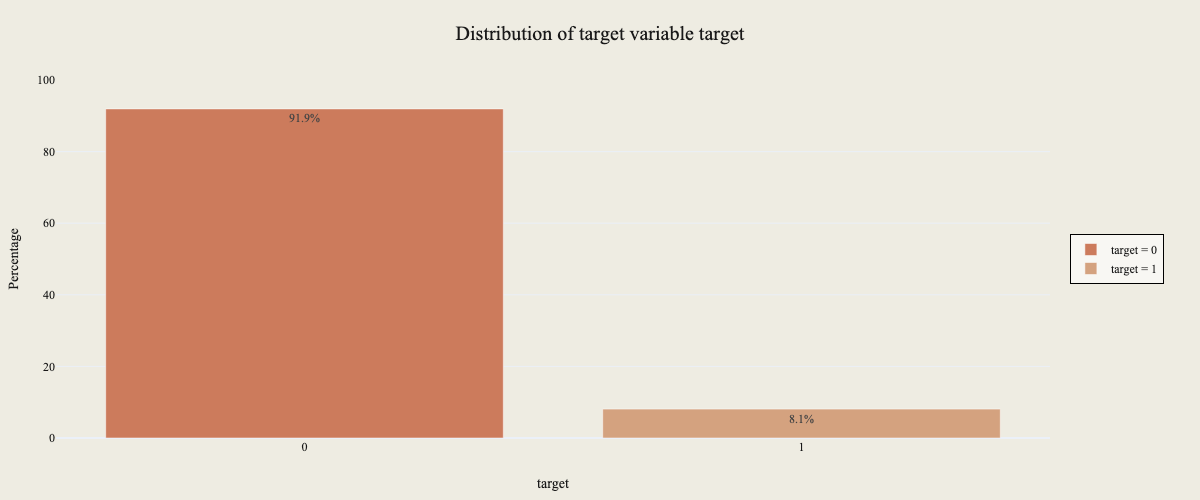

In [9]:
Image(filename="../images/target_distribution.png")

Due to the significant class imbalance in the target variable, we will visualize the distribution of numerical features using the entire dataset, rather than comparing distributions separately for each target class.

In [10]:
plot_combined_histograms(
    application_train,
    numerical_features_financial,
    save_path="../images/numerical_features_financial.png",
)

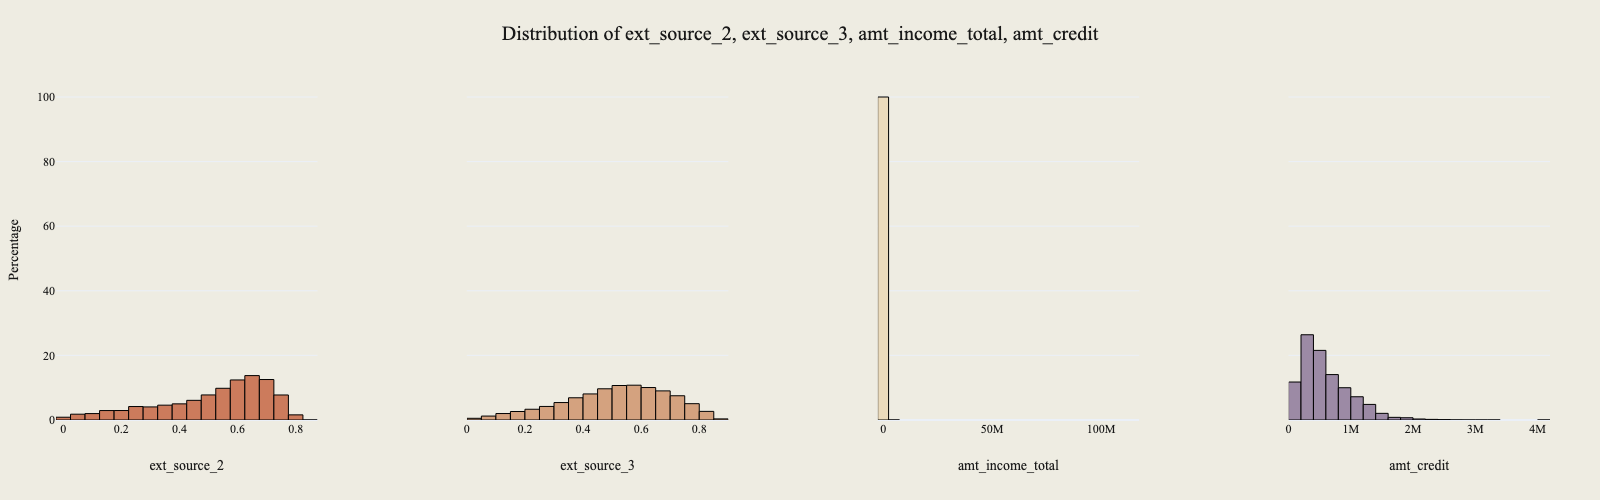

In [11]:
Image(filename="../images/numerical_features_financial.png")

- **ext_source_2 & ext_source_3:** Both show a somewhat normal distribution, but with a peak towards the lower end of their values. This suggests these external sources might have a bias towards lower scores.
- **amt_income_total:** Heavily skewed to the right, indicating most incomes are clustered at the lower end with a few very high earners.
- **amt_credit:** Also right-skewed, meaning most loans are for smaller amounts, with a long tail of larger loans.

In [12]:
plot_combined_histograms(
    pd_application_train,
    numerical_features_loan_specifics,
    save_path="../images/numerical_features_loan_specifics.png",
)

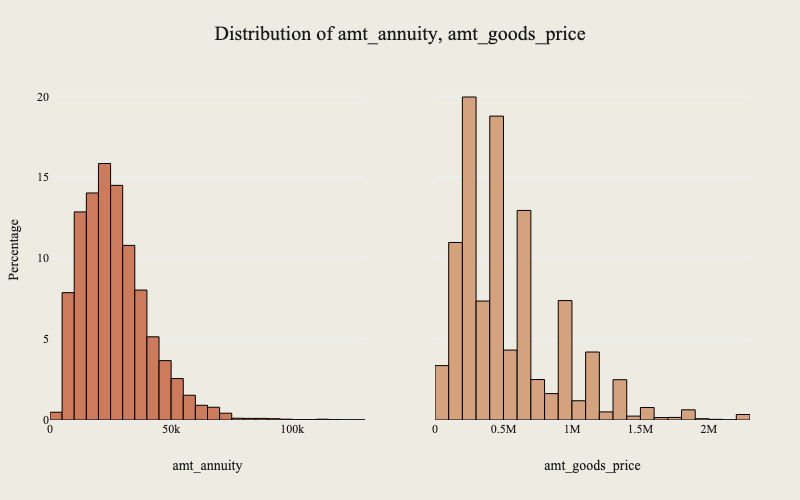

In [13]:
Image(filename="../images/numerical_features_loan_specifics.png")

- **amt_annuity:** Right-skewed, suggesting most loan annuity payments are smaller, with a few much larger payments.
- **amt_goods_price:** Right-skewed as well, indicating most loans are for lower-priced goods, with a tail of loans for more expensive items.

In [14]:
plot_combined_histograms(
    pd_application_train,
    numerical_features_timing_history,
    save_path="../images/numerical_features_timing_history.png",
)

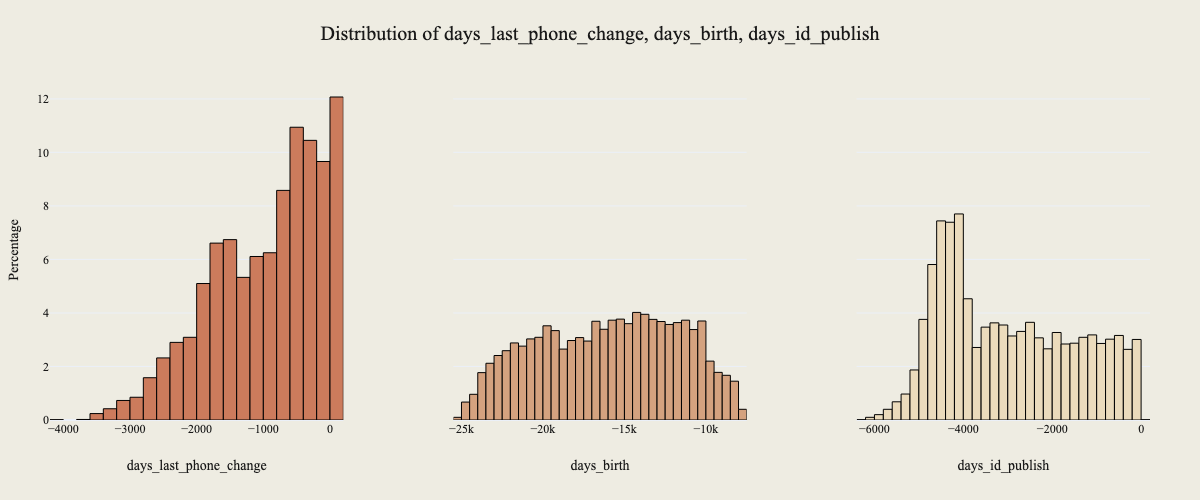

In [15]:
Image(filename="../images/numerical_features_timing_history.png")

- **days_last_phone_change:** Mostly clustered towards more recent phone changes (closer to 0), with a sharp drop-off for older changes.
- **days_birth:** Shows the age distribution of loan applicants, with a peak around middle age. The negative values represent days before the loan application.
- **days_id_publish:** Right-skewed, indicating most applicants provided their ID relatively recently before the loan application.

General observations:

- **Right Skew:** Many of the financial features (income, credit, annuity, goods price) are right-skewed, which is common in financial data. This indicates a concentration of lower values with a few high-value outliers.
- **External Sources:** The distribution of `ext_source_2` and `ext_source_3` suggests potential bias in these external scoring systems.
- **Time-Based Features:** The distributions of `days_last_phone_change`, `days_birth`, and `days_id_publish` provide insights into the recency of actions and the age distribution of applicants.

**Next up**, let's examine the distributions of our categorical features.

In [16]:
categorical_features_personal = [
    "name_contract_type",
    "code_gender",
    "flag_own_car",
    "flag_own_realty",
]

categorical_features_housing_family = [
    "name_type_suite",
    "name_income_type",
    "name_education_type",
    "name_family_status",
]

categorical_features_occupation = [
    "name_housing_type",
    "occupation_type",
    "housetype_mode",
    "emergencystate_mode",
]

categorical_features_work_context = [
    "weekday_appr_process_start",
    "organization_type",
    "reg_city_not_work_city",
]

categorical_features_ratings = [
    "region_rating_client",
    "region_rating_client_w_city",
]

In [17]:
all_categorical_features = (
    categorical_features_personal
    + categorical_features_housing_family
    + categorical_features_occupation
    + categorical_features_work_context
    + categorical_features_ratings
)

all_numerical_features = (
    numerical_features_timing_history
    + numerical_features_financial
    + numerical_features_loan_specifics
)

all_features = all_categorical_features + all_numerical_features

In [18]:
plot_categorical_features_by_target(pd_application_train, categorical_features_personal, target_feature, save_path="../images/categorical_features_personal.png")

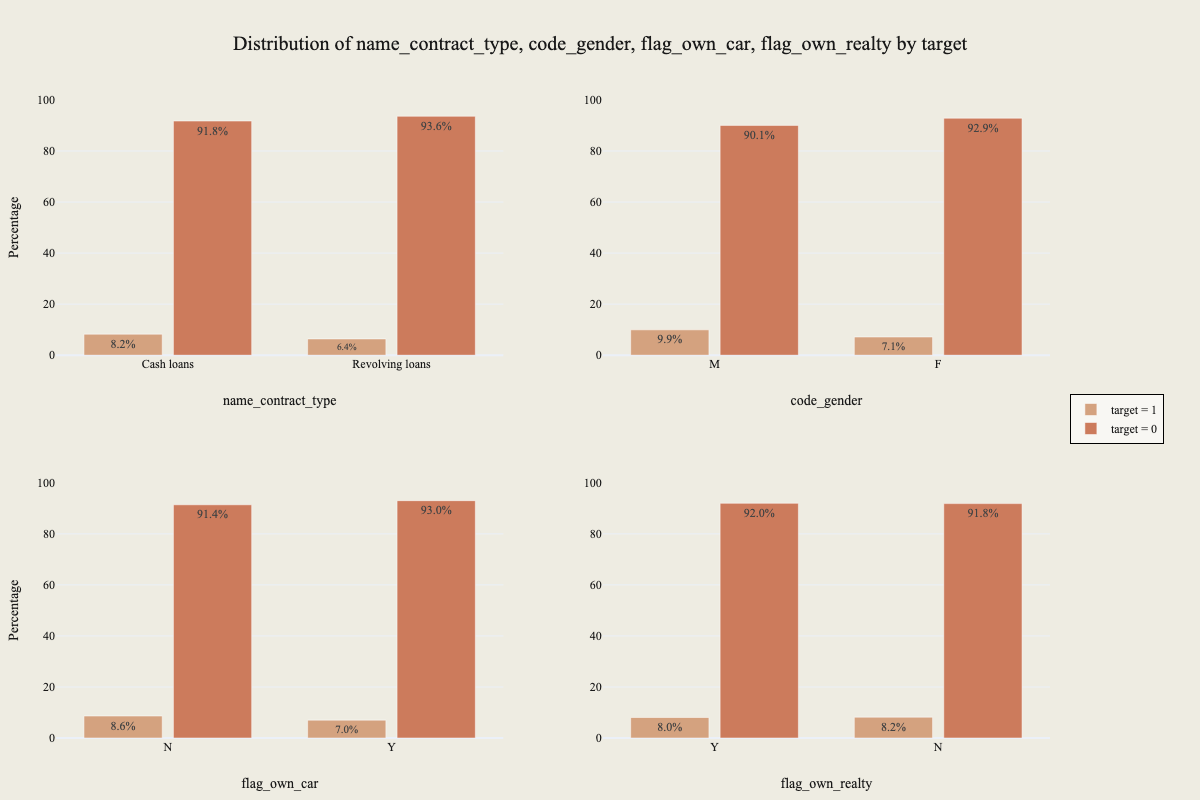

In [19]:
Image(filename="../images/categorical_features_personal.png")

* **Contract Type:** Revolving loans (like credit cards) have a much lower risk of default compared to cash loans.
* **Gender:** Males have a slightly higher risk of loan default.
* **Car Ownership:** Not owning a car is associated with a slightly higher risk of loan default.
* **Realty Ownership:** Not owning realty is associated with a slightly higher risk of loan default.

**Chart 5:**

* **Weekday Application:** Loan applications processed mid-week (Wednesday and Thursday) have slightly higher default rates.
* **Organization Type:**  Most organization types have similar default rates, with some exceptions (e.g., Industry type 11 might be higher risk).
* **City Match:**  When the applicant's city and work city don't match, the risk of loan default is higher.

**Overall Interpretation in Credit Context:**

These charts reveal patterns that can be used to assess credit risk. Factors like stable family situation (married, living with family), higher education, stable income (working or commercial associate), owning assets (car, realty), and living in higher-rated regions are associated with lower credit risk. Conversely, being unaccompanied, having lower education, unstable housing, working in lower-skilled jobs, and living in lower-rated regions suggest higher credit risk.


In [20]:
plot_categorical_features_by_target(pd_application_train, categorical_features_housing_family, target_feature, save_path="../images/categorical_features_housing_family.png")

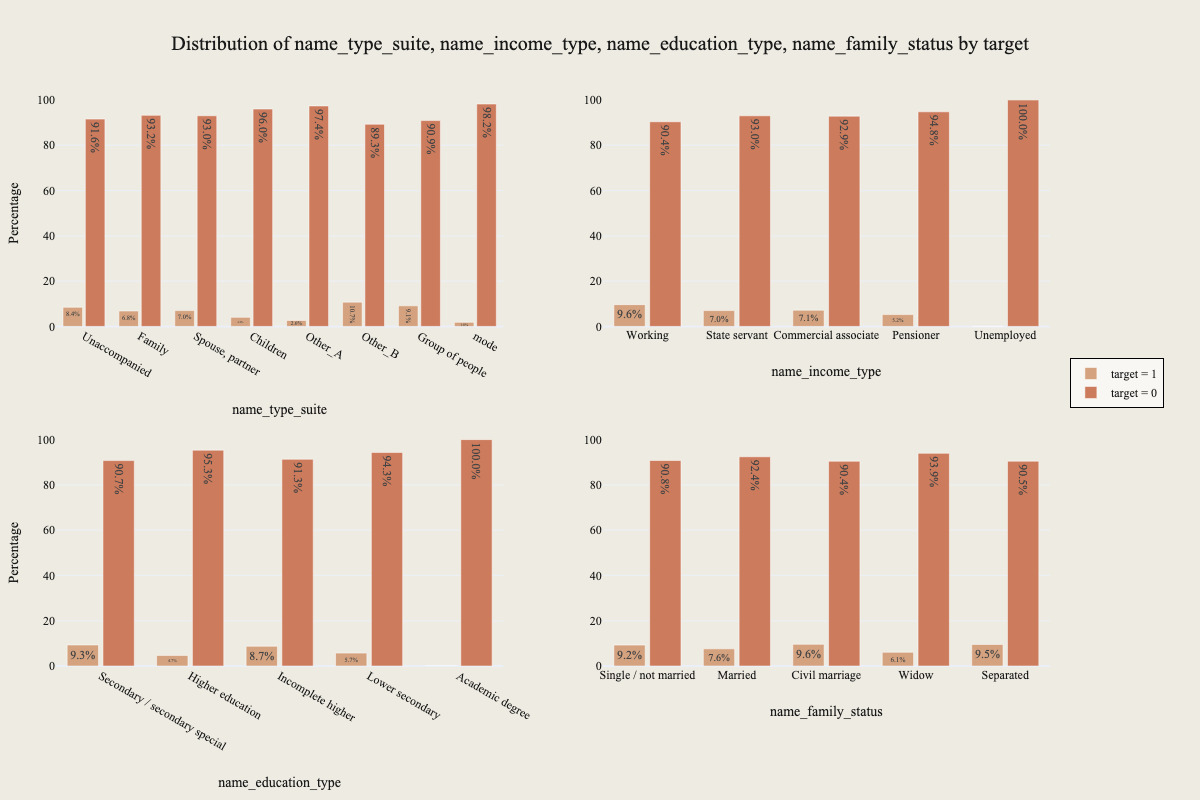

In [21]:
Image(filename="../images/categorical_features_housing_family.png")

* **family_status:** Being married (especially in a civil marriage) is associated with a lower risk of loan default.
* **suite_type:** Living with family is associated with a lower risk of loan default.
* **education:** Lower levels of education show a slightly higher risk of loan default.
* **income_type:** Working and Commercial associate income types have the lowest risk of loan default.

In [22]:
plot_categorical_features_by_target(pd_application_train, categorical_features_occupation, target_feature, save_path="../images/categorical_features_occupation.png")

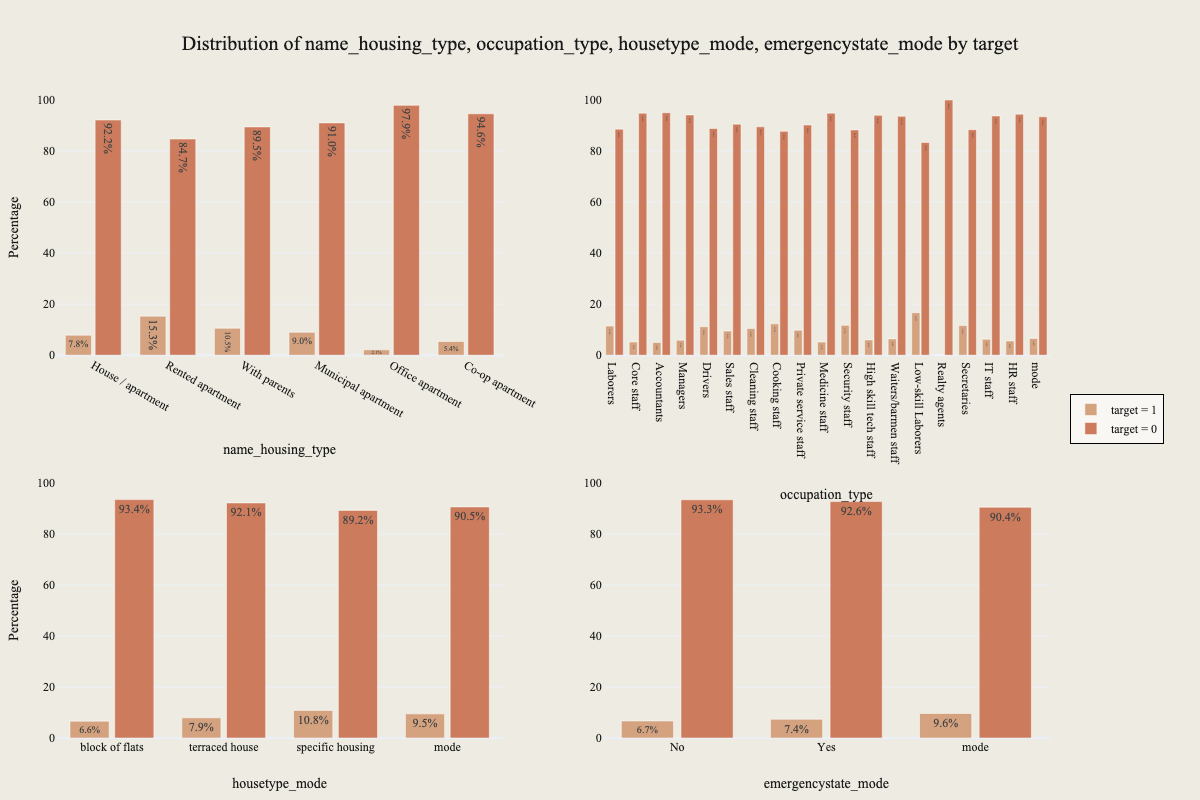

In [23]:
Image(filename="../images/categorical_features_occupation.png")

* **housing_type:** Renting an apartment or living with parents indicates a higher risk of loan default.
* **occupation:** Laborers and low-skill laborers have higher risks of loan default.
* **housetype:** Living in a block of flats has a higher risk of loan default.
* **emergencystate:**  Having an emergency state is associated with a slightly higher risk of loan default.

In [24]:
plot_categorical_features_by_target(pd_application_train, categorical_features_work_context, target_feature, save_path="../images/categorical_features_work_context.png")

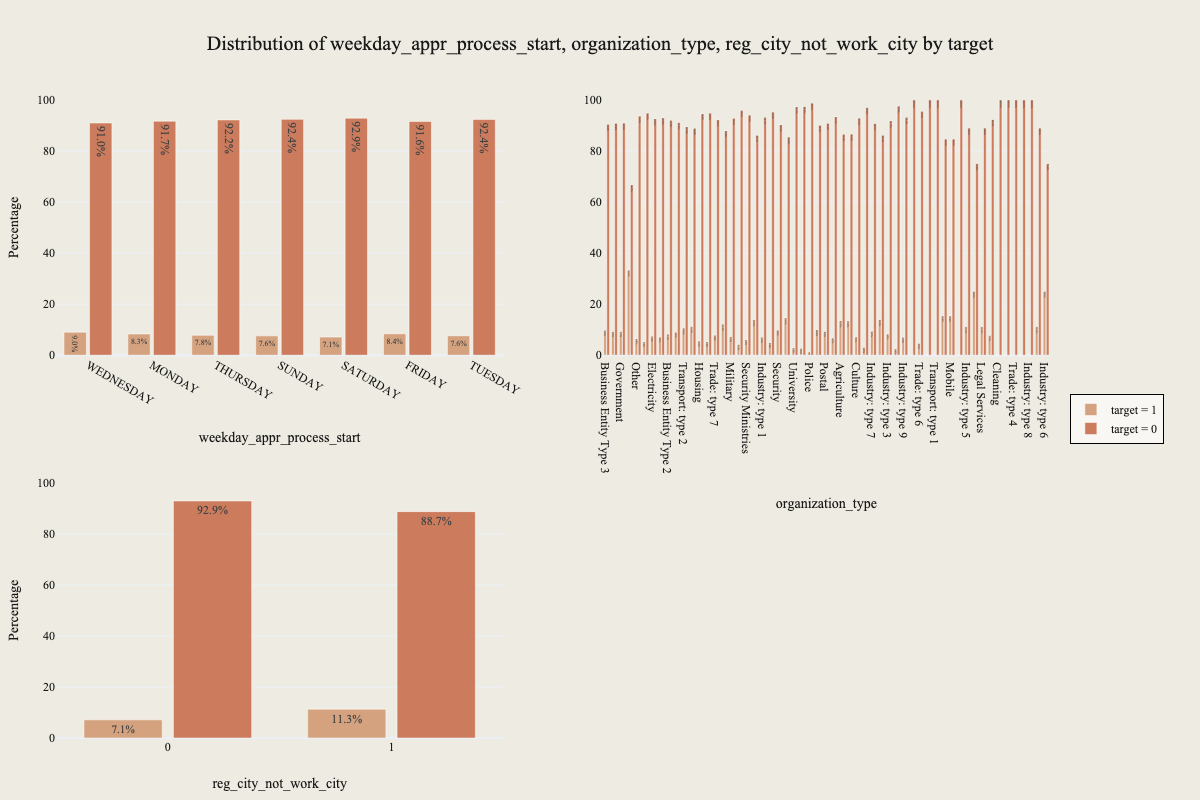

In [25]:
Image(filename="../images/categorical_features_work_context.png")

* **weekday_appr:** Loan applications processed mid-week (Wednesday and Friday) have slightly higher default rates.
* **organization_type:**  Most organization types have similar default rates, with some exceptions (e.g., Legal and Other).
* **reg_city:**  When the applicant's city and work city don't match, the risk of loan default is higher.

In [26]:
plot_categorical_features_by_target(pd_application_train, categorical_features_ratings, target_feature, save_path="../images/categorical_features_ratings.png")

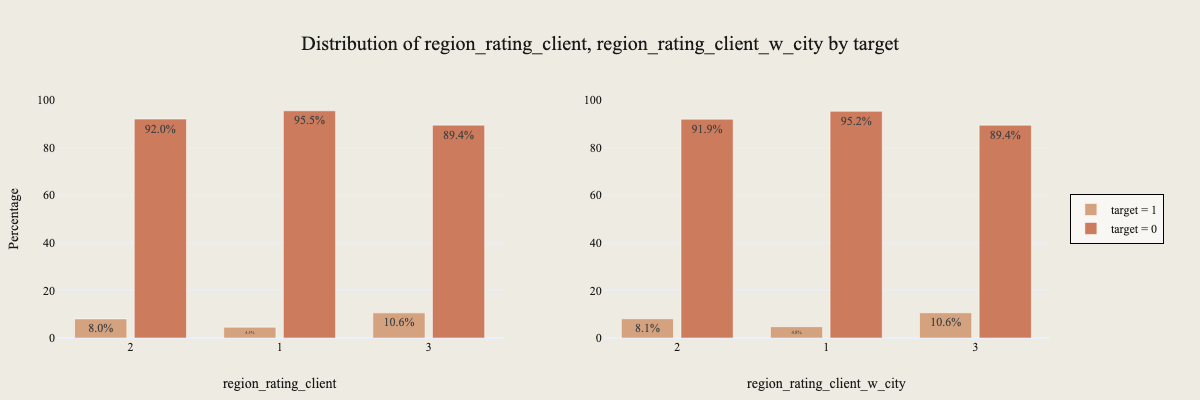

In [27]:
Image(filename="../images/categorical_features_ratings.png")

* **region_ratings:** Applicants from regions with lower credit ratings (1 and 3) have slightly higher risks of loan default. This trend holds regardless of whether the city is considered.

The visualizations of categorical features reveal that stable family situations, higher education levels, stable income sources, and asset ownership are associated with lower credit risk.

Conversely, unstable housing, lower education, lower-skilled jobs, and residing in lower-rated regions suggest higher risk.

Loan type and application details, such as the day of the week the application was processed and whether the applicant's city and work city match, can also influence credit risk.

Next, we can check for any correlations between our numerical features using a correlation matrix.

In [28]:
plot_correlation_matrix(
    pd_application_train,
    all_numerical_features,
    save_path="../images/correlation_matrix.png",
)

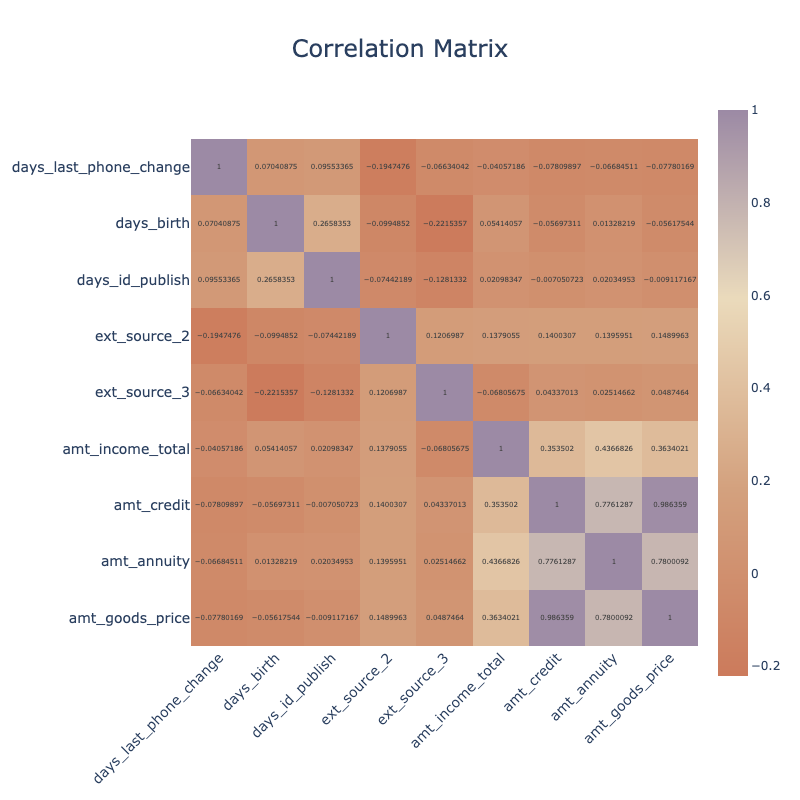

In [29]:
Image(filename="../images/correlation_matrix.png")

* **Strong Negative Correlation:** `days_birth` (likely age of the applicant) and `days_id_publish` (days since ID was published) show a strong negative correlation (-0.99). This suggests that older applicants tend to have had their IDs published for a longer time.

* **Moderate Positive Correlation:** `amt_credit` (credit amount) and `amt_goods_price` (price of goods) have a moderate positive correlation (0.78). This indicates that higher credit amounts are often associated with higher prices of goods being purchased.

* **Moderate Positive Correlation:** `amt_annuity` (loan annuity) and `amt_credit` also show a moderate positive correlation (0.77). This implies that higher credit amounts tend to have higher loan annuity payments.

* **Weak Correlations:** Most other feature pairs exhibit weak correlations (close to 0), suggesting little to no linear relationship between them. For example, `days_last_phone_change` (days since last phone number change) has weak correlations with most other features.

* **External Sources:** `ext_source_2` and `ext_source_3` (likely external credit scores or ratings) show some moderate negative correlations with `days_birth` and positive correlations with `amt_credit`, suggesting potential relationships between these external sources, age, and credit amount.

So, the correlation matrix highlights a strong negative relationship between age and time since ID publication, as well as moderate positive relationships between credit amount, goods price, and loan annuity. Most other features show weak or no linear correlations.

**Note:** Correlation only measures linear relationships. It is possible that non-linear relationships exist between features that are not captured by the correlation matrix.

That being said, we can check for outliers in our numerical features using a box plot.

In [30]:
plot_combined_boxplots(
    pd_application_train,
    numerical_features_financial,
    save_path="../images/box_plots_numerical_features_financial.png",
);

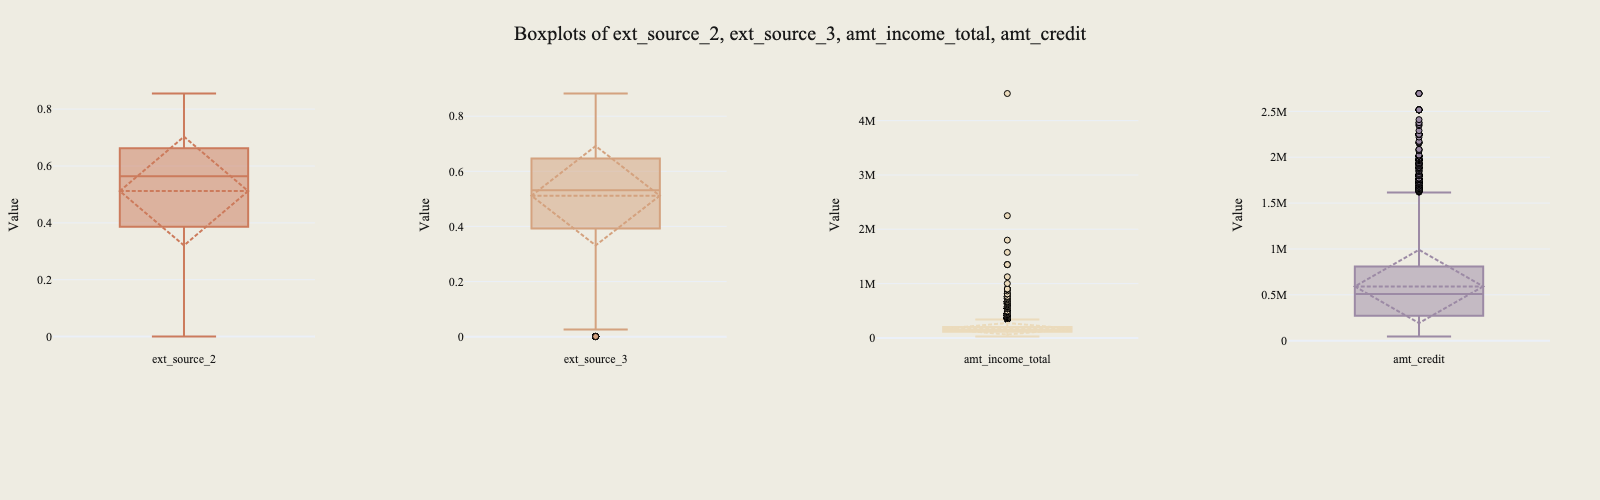

In [31]:
Image(filename='../images/box_plots_numerical_features_financial.png')

We can see the presence of outliers in all four features. `ext_source_2` and `ext_source_3` show a few outliers, while `amt_income_total` and `amt_credit` exhibit a substantial number of outliers, particularly at the higher end.

Next, we will check for outliers in the `numerical_features_loan_specifics` feature set.

In [32]:
plot_combined_boxplots(
    pd_application_train,
    numerical_features_loan_specifics,
    save_path="../images/box_plots_numerical_features_loan_specifics.png",
);

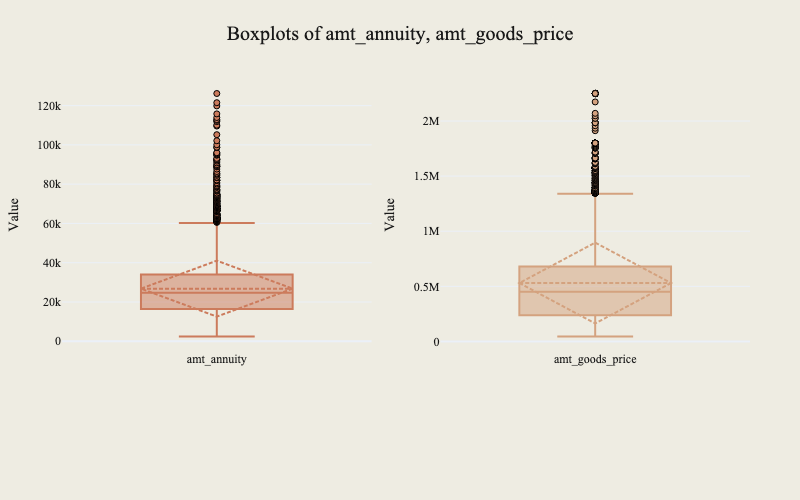

In [33]:
Image(filename='../images/box_plots_numerical_features_loan_specifics.png')

Both `amt_annuity` and `amt_goods_price` show a significant number of outliers, especially at the higher ends of their respective distributions.

Finally, we will check for outliers in our last subset of features, `numerical_features_timing_history`. 


In [34]:
plot_combined_boxplots(
    pd_application_train,
    numerical_features_timing_history,
    save_path="../images/box_plots_numerical_features_timing_history.png",
);

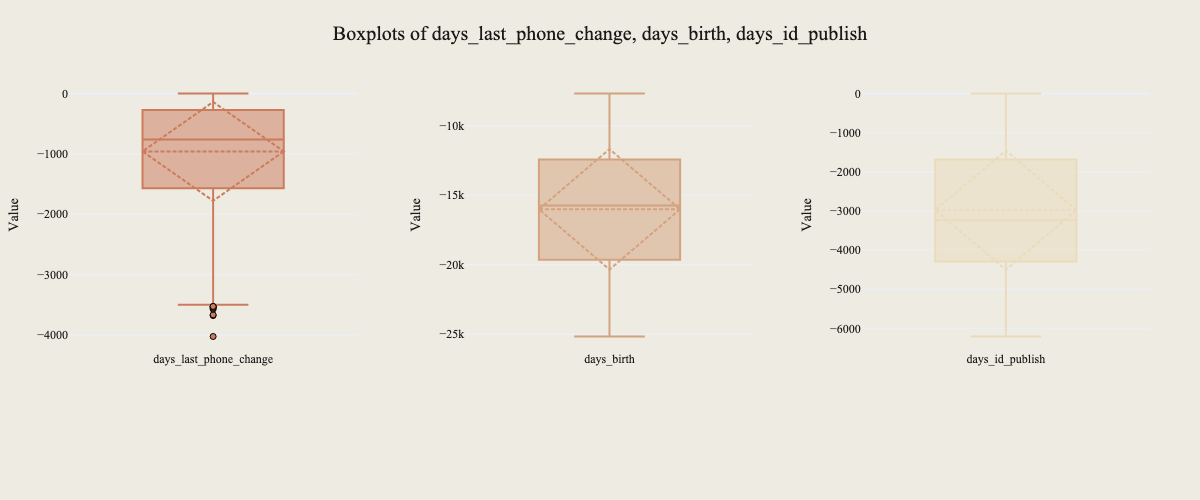

In [35]:
Image(filename="../images/box_plots_numerical_features_timing_history.png")

We observe that `days_last_phone_change` and `days_birth` have a moderate number of outliers, while `days_id_publish` shows a few outliers, primarily at the lower end of its distribution.

Overall, several features, particularly those related to income, credit amount, and annuity, exhibit a considerable number of outliers.

Since we have identified outliers in these features, we will flag them in a new `is_anomaly` feature. We will refrain from directly manipulating or transforming the original financial data, as doing so could potentially distort the results of our analysis.